In [1]:
import pandas as pd
import os
import numpy as np
import sys
import tsfresh as tsf
from tsfresh.utilities.dataframe_functions import impute

ImportError: cannot import name 'Iterable' from 'collections' (/home/optimusprime/miniconda3/envs/test-deepar-gpu/lib/python3.11/collections/__init__.py)

In [ ]:


region_name = "Singapore"

"""windows  
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data')
"""

""" windows 
df_dem = pd.read_csv('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\demand_data\\' + region_name + '_region_demand2.csv')
df_inf = pd.read_csv('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\demand_data\\' + region_name + '_region_inflow2.csv')
"""

""" Linux"""
os.chdir('/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/demand_data/standalone')


"""colab
os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/demand_data/standalone')
"""


df_outf = pd.read_csv('outflow_cluster_dem.csv')
#df_outf = df_outf.drop(columns=['Unnamed: 0'])

df_inf = pd.read_csv('inflow_cluster_dem.csv')
#df_inf = df_inf.drop(columns=['Unnamed: 0'])

if(df_outf.shape[0] != df_inf.shape[0]): # check if dem and inf are same length
    print("outflow and inflow are NOT of same length")
    sys.exit()


In [ ]:
df_inf

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0
2176,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,3.0,1.0,...,0.0,1.0,2.0,3.0,0.0,1.0,4.0,1.0,4.0,1.0
2177,2.0,2.0,2.0,0.0,1.0,2.0,1.0,2.0,6.0,0.0,...,1.0,3.0,1.0,3.0,0.0,1.0,2.0,7.0,4.0,4.0
2178,0.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,...,3.0,1.0,0.0,1.0,1.0,0.0,2.0,5.0,5.0,5.0


,1,8,10,11,12,16,19,25,30,31,...,180,181,182,183,184,187,190,191,192,193
0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,3.0,0.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,...,3.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0
2176,2.0,2.0,3.0,0.0,1.0,0.0,2.0,2.0,4.0,2.0,...,2.0,5.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,3.0
2177,1.0,2.0,3.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,...,0.0,0.0,2.0,0.0,0.0,4.0,5.0,1.0,3.0,3.0
2178,1.0,5.0,4.0,0.0,3.0,2.0,2.0,0.0,4.0,3.0,...,0.0,3.0,2.0,1.0,1.0,1.0,3.0,3.0,5.0,2.0


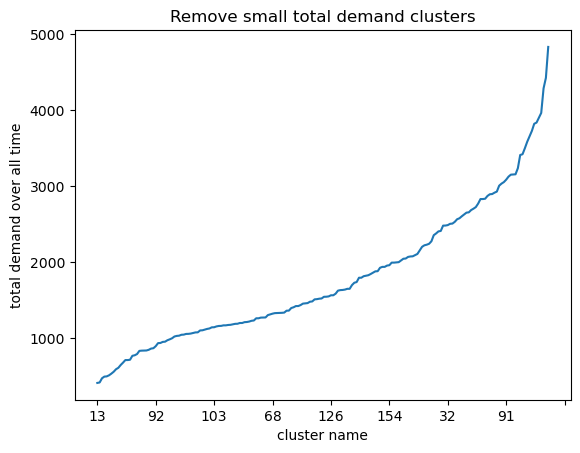

In [ ]:
"""
            !!IN ORDER TO TRAIN FASTER FOR THE WORKSHOP!!

Find total demand of individual clusters demand and remove 100 smallest clusters total demand.  

"""

df_outf.sum(axis=0).sort_values().plot(xlabel='cluster name',ylabel='total demand over all time',title='Remove small total demand clusters')

sorted_cluster_list = df_outf.sum(axis=0).sort_values().index

drop_clusters = sorted_cluster_list[:120] # remove 120 smallest clusters

df_outf = df_outf.drop(columns=drop_clusters)
df_inf = df_inf.drop(columns=drop_clusters)
df_outf




In [ ]:
class create_raw_features(object):
    #def __init__(self,):


    def create_lag_features(ts,lags_list):
        lag_ts0 = ts.shift(periods = lags_list[0])
        lag_ts1 = ts.shift(periods = lags_list[1])
        return lag_ts0,lag_ts1

    def create_diff_ts_features(ts,diff_list):
        diff1_p1 = ts.diff(periods=diff_list[0])
        diff1_p2 = ts.diff(periods=diff_list[1])

        diff2_p1 = ts.diff(periods=diff_list[0]).diff()
        return diff1_p1,diff1_p2,diff2_p1


In [ ]:
"""
stack all the raw feature time series of clusters vertically

tsfresh features are then added to these raw features to enlarge the feature set
"""


dt = pd.Timestamp("2021-09-24") + pd.to_timedelta(range(df_inf.shape[0]), "H")
raw_feat_df = pd.DataFrame(columns=['time_idx','datetime','group','target','inflow_lag168','inflow_lag336','outflow_lag168','outflow_lag336','inflow','inflow_diff1_per1','inflow_diff1_per2','inflow_diff2_per1','outflow_lag1','outflow_lag2','outflow_lag3','outflow_lag4','outflow_lag24','outflow_lag48'])

lags_list = [168,336]
lags_list1 = [1,2]
lags_list2 = [3,4]
lags_list3 = [24,48]
diff_list = [1,2]


for c in df_inf.columns:
    temp_df = pd.DataFrame(columns=['time_idx','datetime','group','target','inflow_lag168','inflow_lag336','outflow_lag168','outflow_lag336','inflow','inflow_diff1_per1','inflow_diff1_per2','inflow_diff2_per1','outflow_lag1','outflow_lag2','outflow_lag3','outflow_lag4','outflow_lag24','outflow_lag48'])
    temp_df['time_idx'] = range(df_inf.shape[0])
    temp_df['datetime'] = dt
    temp_df['target'] = df_outf[c]    
    temp_df['group'] = np.repeat(int(c),df_inf.shape[0])
    temp_df['inflow_lag168'],temp_df['inflow_lag336'] = create_raw_features.create_lag_features(df_inf[c],lags_list)
    temp_df['outflow_lag168'],temp_df['outflow_lag336'] = create_raw_features.create_lag_features(df_outf[c],lags_list)

    temp_df['inflow'] = df_inf[c]    
    temp_df['inflow_diff1_per1'],temp_df['inflow_diff1_per2'], temp_df['inflow_diff2_per1'] = create_raw_features.create_diff_ts_features(df_inf[c],diff_list)    
    temp_df['outflow_lag1'],temp_df['outflow_lag2'] = create_raw_features.create_lag_features(df_outf[c],lags_list1)
    temp_df['outflow_lag3'],temp_df['outflow_lag4'] = create_raw_features.create_lag_features(df_outf[c],lags_list2)
    temp_df['outflow_lag24'],temp_df['outflow_lag48'] = create_raw_features.create_lag_features(df_outf[c],lags_list3)

    raw_feat_df = pd.concat([raw_feat_df, temp_df],axis=0)


raw_feat_df = raw_feat_df.dropna().reset_index(drop=True)
raw_feat_df

,time_idx,datetime,group,target,inflow,inflow_lag168,inflow_lag336,outflow_lag168,outflow_lag336,inflow_diff1_per1,inflow_diff1_per2,inflow_diff2_per1
0,336,2021-10-08 00:00:00,1,0.0,0.0,1.0,2.0,0.0,2.0,-3.0,-2.0,-4.0
1,337,2021-10-08 01:00:00,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-3.0,3.0
2,338,2021-10-08 02:00:00,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,339,2021-10-08 03:00:00,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,340,2021-10-08 04:00:00,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136451,2175,2021-12-23 15:00:00,193,0.0,2.0,2.0,2.0,1.0,0.0,2.0,-1.0,5.0
136452,2176,2021-12-23 16:00:00,193,3.0,1.0,1.0,2.0,2.0,3.0,-1.0,1.0,-3.0
136453,2177,2021-12-23 17:00:00,193,3.0,4.0,0.0,1.0,2.0,1.0,3.0,2.0,4.0
136454,2178,2021-12-23 18:00:00,193,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,-2.0


In [ ]:
"""
Create TSFRESH Time series features

"""


win_lengths = [24] # hyperparameter

# drop all categorical columns

col_list = raw_feat_df.columns


feature_settings = {'fft_coefficient': [{'coeff': 0, 'attr': 'real'}, {'coeff': 1, 'attr': 'real'}],
                    #'mean': None,
                    #'standard_deviation': None,
                    'skewness': None,
                    'kurtosis': None,
                    #'minimum': None,
                    #'maximum': None,
                    #'sum_values': None,
                    #'variance': None,
                    #'absolute_sum_of_changes': None,
                    'count_above_mean': None,
                    'count_below_mean': None,
                    #'longest_strike_above_mean': None,
                    #'longest_strike_below_mean': None,
                    #'number_crossing_m': [{'m': 0}],
                    'autocorrelation': [{'lag': 1}, {'lag': 2}, {'lag': 3}],
                    'partial_autocorrelation': [{'lag': 1}, {'lag': 2}, {'lag': 3}]}


for c in col_list[8:]: # select 1 numeric column at a time, leave out target and long lags
    print('time series name: ',c)
    for win in win_lengths:
        num_df = raw_feat_df.loc[:,['datetime','group',c]]
        print('num_df.shape', num_df.shape)
        df_rolled = tsf.utilities.dataframe_functions.roll_time_series(num_df,column_id='group',column_sort='datetime',max_timeshift=win)
        df_rolled.drop(columns=['group'], inplace=True)
        df_features = tsf.extract_features(df_rolled, column_id='id', column_sort='datetime', 
                                            default_fc_parameters=feature_settings)
        del df_rolled # free-up the RAM

        # Remove any missing values
        imputed_features = impute(df_features)
        del df_features # free-up the RAM

        # Select a subset of relevant features using tsfresh's built-in feature selection function
        raw_feat_df.index= range(raw_feat_df.shape[0])
        imputed_features.index = range(raw_feat_df.shape[0])
        selected_features = tsf.select_features(imputed_features, raw_feat_df['target'])
        del imputed_features # free-up the RAM

        # Print the names of the selected features
        print('selected_features.columns',selected_features.columns)

        print('selected_features.columns: ',selected_features.columns)
        print('selected_features.shape: ',selected_features.shape)

        print('all_stns_df.columns: ',raw_feat_df.columns)
        print('all_stns_df.shape: ',raw_feat_df.shape)



        raw_feat_df = pd.concat([raw_feat_df,selected_features],axis=1)



        del num_df # free-up the RAM
        del selected_features # free-up the RAM


raw_feat_df.shape




time series name:  inflow
num_df.shape (136456, 3)


Feature Extraction: 100%|██████████| 60/60 [00:19<00:00,  3.13it/s]


selected_features.columns Index(['inflow__fft_coefficient__attr_"real"__coeff_0',
       'inflow__fft_coefficient__attr_"real"__coeff_1', 'inflow__skewness',
       'inflow__autocorrelation__lag_1',
       'inflow__partial_autocorrelation__lag_1',
       'inflow__autocorrelation__lag_3', 'inflow__autocorrelation__lag_2',
       'inflow__kurtosis', 'inflow__partial_autocorrelation__lag_2',
       'inflow__partial_autocorrelation__lag_3', 'inflow__count_below_mean'],
      dtype='object')
selected_features.columns:  Index(['inflow__fft_coefficient__attr_"real"__coeff_0',
       'inflow__fft_coefficient__attr_"real"__coeff_1', 'inflow__skewness',
       'inflow__autocorrelation__lag_1',
       'inflow__partial_autocorrelation__lag_1',
       'inflow__autocorrelation__lag_3', 'inflow__autocorrelation__lag_2',
       'inflow__kurtosis', 'inflow__partial_autocorrelation__lag_2',
       'inflow__partial_autocorrelation__lag_3', 'inflow__count_below_mean'],
      dtype='object')
selected_featu

Feature Extraction: 100%|██████████| 60/60 [00:19<00:00,  3.13it/s]


selected_features.columns Index(['inflow_lag168__fft_coefficient__attr_"real"__coeff_0',
       'inflow_lag168__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag168__skewness', 'inflow_lag168__autocorrelation__lag_2',
       'inflow_lag168__autocorrelation__lag_3',
       'inflow_lag168__autocorrelation__lag_1',
       'inflow_lag168__partial_autocorrelation__lag_1',
       'inflow_lag168__kurtosis',
       'inflow_lag168__partial_autocorrelation__lag_2',
       'inflow_lag168__partial_autocorrelation__lag_3',
       'inflow_lag168__count_below_mean'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag168__fft_coefficient__attr_"real"__coeff_0',
       'inflow_lag168__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag168__skewness', 'inflow_lag168__autocorrelation__lag_2',
       'inflow_lag168__autocorrelation__lag_3',
       'inflow_lag168__autocorrelation__lag_1',
       'inflow_lag168__partial_autocorrelation__lag_1',
       'inflow_lag168__kurtos

Feature Extraction: 100%|██████████| 60/60 [00:19<00:00,  3.05it/s]


selected_features.columns Index(['inflow_lag336__fft_coefficient__attr_"real"__coeff_0',
       'inflow_lag336__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag336__skewness', 'inflow_lag336__autocorrelation__lag_2',
       'inflow_lag336__autocorrelation__lag_3',
       'inflow_lag336__autocorrelation__lag_1',
       'inflow_lag336__partial_autocorrelation__lag_1',
       'inflow_lag336__kurtosis',
       'inflow_lag336__partial_autocorrelation__lag_2',
       'inflow_lag336__partial_autocorrelation__lag_3',
       'inflow_lag336__count_below_mean'],
      dtype='object')
selected_features.columns:  Index(['inflow_lag336__fft_coefficient__attr_"real"__coeff_0',
       'inflow_lag336__fft_coefficient__attr_"real"__coeff_1',
       'inflow_lag336__skewness', 'inflow_lag336__autocorrelation__lag_2',
       'inflow_lag336__autocorrelation__lag_3',
       'inflow_lag336__autocorrelation__lag_1',
       'inflow_lag336__partial_autocorrelation__lag_1',
       'inflow_lag336__kurtos

Feature Extraction: 100%|██████████| 60/60 [00:19<00:00,  3.10it/s]


selected_features.columns Index(['outflow_lag168__fft_coefficient__attr_"real"__coeff_0',
       'outflow_lag168__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag168__skewness', 'outflow_lag168__kurtosis',
       'outflow_lag168__autocorrelation__lag_2',
       'outflow_lag168__partial_autocorrelation__lag_2',
       'outflow_lag168__autocorrelation__lag_1',
       'outflow_lag168__partial_autocorrelation__lag_1',
       'outflow_lag168__autocorrelation__lag_3',
       'outflow_lag168__partial_autocorrelation__lag_3',
       'outflow_lag168__count_below_mean'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag168__fft_coefficient__attr_"real"__coeff_0',
       'outflow_lag168__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag168__skewness', 'outflow_lag168__kurtosis',
       'outflow_lag168__autocorrelation__lag_2',
       'outflow_lag168__partial_autocorrelation__lag_2',
       'outflow_lag168__autocorrelation__lag_1',
       'outflow_lag168__p

Feature Extraction: 100%|██████████| 60/60 [00:19<00:00,  3.12it/s]


selected_features.columns Index(['outflow_lag336__fft_coefficient__attr_"real"__coeff_0',
       'outflow_lag336__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag336__skewness', 'outflow_lag336__kurtosis',
       'outflow_lag336__autocorrelation__lag_2',
       'outflow_lag336__partial_autocorrelation__lag_2',
       'outflow_lag336__autocorrelation__lag_3',
       'outflow_lag336__autocorrelation__lag_1',
       'outflow_lag336__partial_autocorrelation__lag_1',
       'outflow_lag336__partial_autocorrelation__lag_3'],
      dtype='object')
selected_features.columns:  Index(['outflow_lag336__fft_coefficient__attr_"real"__coeff_0',
       'outflow_lag336__fft_coefficient__attr_"real"__coeff_1',
       'outflow_lag336__skewness', 'outflow_lag336__kurtosis',
       'outflow_lag336__autocorrelation__lag_2',
       'outflow_lag336__partial_autocorrelation__lag_2',
       'outflow_lag336__autocorrelation__lag_3',
       'outflow_lag336__autocorrelation__lag_1',
       'outflow_lag

Feature Extraction: 100%|██████████| 60/60 [00:19<00:00,  3.11it/s]


selected_features.columns Index(['inflow_diff1_per1__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per1__count_below_mean',
       'inflow_diff1_per1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff1_per1__count_above_mean',
       'inflow_diff1_per1__partial_autocorrelation__lag_3',
       'inflow_diff1_per1__partial_autocorrelation__lag_2',
       'inflow_diff1_per1__autocorrelation__lag_1',
       'inflow_diff1_per1__partial_autocorrelation__lag_1',
       'inflow_diff1_per1__kurtosis',
       'inflow_diff1_per1__autocorrelation__lag_3'],
      dtype='object')
selected_features.columns:  Index(['inflow_diff1_per1__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per1__count_below_mean',
       'inflow_diff1_per1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff1_per1__count_above_mean',
       'inflow_diff1_per1__partial_autocorrelation__lag_3',
       'inflow_diff1_per1__partial_autocorrelation__lag_2',
       'inflow_diff1_per1__au

Feature Extraction: 100%|██████████| 60/60 [00:23<00:00,  2.57it/s]


selected_features.columns Index(['inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff1_per2__count_below_mean',
       'inflow_diff1_per2__partial_autocorrelation__lag_2',
       'inflow_diff1_per2__autocorrelation__lag_2',
       'inflow_diff1_per2__kurtosis',
       'inflow_diff1_per2__partial_autocorrelation__lag_3',
       'inflow_diff1_per2__autocorrelation__lag_1',
       'inflow_diff1_per2__partial_autocorrelation__lag_1',
       'inflow_diff1_per2__autocorrelation__lag_3',
       'inflow_diff1_per2__count_above_mean'],
      dtype='object')
selected_features.columns:  Index(['inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff1_per2__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff1_per2__count_below_mean',
       'inflow_diff1_per2__partial_autocorrelation__lag_2',
       'inflow_diff1_per2__autocorrelation__lag_2',
       'inflow_diff1_per2__kurt

Feature Extraction: 100%|██████████| 60/60 [00:19<00:00,  3.03it/s]


selected_features.columns Index(['inflow_diff2_per1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff2_per1__count_above_mean',
       'inflow_diff2_per1__partial_autocorrelation__lag_3',
       'inflow_diff2_per1__partial_autocorrelation__lag_2',
       'inflow_diff2_per1__count_below_mean',
       'inflow_diff2_per1__autocorrelation__lag_1',
       'inflow_diff2_per1__partial_autocorrelation__lag_1',
       'inflow_diff2_per1__skewness',
       'inflow_diff2_per1__fft_coefficient__attr_"real"__coeff_0',
       'inflow_diff2_per1__kurtosis',
       'inflow_diff2_per1__autocorrelation__lag_2'],
      dtype='object')
selected_features.columns:  Index(['inflow_diff2_per1__fft_coefficient__attr_"real"__coeff_1',
       'inflow_diff2_per1__count_above_mean',
       'inflow_diff2_per1__partial_autocorrelation__lag_3',
       'inflow_diff2_per1__partial_autocorrelation__lag_2',
       'inflow_diff2_per1__count_below_mean',
       'inflow_diff2_per1__autocorrelation__lag_1',
      

(136456, 98)

In [ ]:
for c in raw_feat_df.columns:
    print(c)

time_idx
datetime
group
target
inflow
inflow_lag168
inflow_lag336
outflow_lag168
outflow_lag336
inflow_diff1_per1
inflow_diff1_per2
inflow_diff2_per1
inflow__fft_coefficient__attr_"real"__coeff_0
inflow__fft_coefficient__attr_"real"__coeff_1
inflow__skewness
inflow__autocorrelation__lag_1
inflow__partial_autocorrelation__lag_1
inflow__autocorrelation__lag_3
inflow__autocorrelation__lag_2
inflow__kurtosis
inflow__partial_autocorrelation__lag_2
inflow__partial_autocorrelation__lag_3
inflow__count_below_mean
inflow_lag168__fft_coefficient__attr_"real"__coeff_0
inflow_lag168__fft_coefficient__attr_"real"__coeff_1
inflow_lag168__skewness
inflow_lag168__autocorrelation__lag_2
inflow_lag168__autocorrelation__lag_3
inflow_lag168__autocorrelation__lag_1
inflow_lag168__partial_autocorrelation__lag_1
inflow_lag168__kurtosis
inflow_lag168__partial_autocorrelation__lag_2
inflow_lag168__partial_autocorrelation__lag_3
inflow_lag168__count_below_mean
inflow_lag336__fft_coefficient__attr_"real"__coeff_

In [ ]:
"""
create train, validation and test sets
SAVE to csv.
"""


train_stop_time = '2021/11/30 00:00'
val_stop_time = '2021/12/16 00:00'


train = raw_feat_df.loc[raw_feat_df['datetime'] < train_stop_time]
val = raw_feat_df.loc[(raw_feat_df['datetime'] >= train_stop_time) & (raw_feat_df['datetime'] < val_stop_time)]
full_train = raw_feat_df.loc[raw_feat_df['datetime'] < val_stop_time] 
test = raw_feat_df.loc[raw_feat_df['datetime'] >= val_stop_time]

"""os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/demand_data/standalone/country_level/train_val_test_data')
"""

os.chdir('/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/demand_data/standalone/country_level/train_val_test_data')
# train.to_csv(region_name+'_all_clstr_train_dem_data.csv',index=False)
# full_train.to_csv(region_name+'_all_clstr_full_train_dem_data.csv',index=False)
# val.to_csv(region_name+'_all_clstr_val_dem_data.csv',index=False)
# test.to_csv(region_name+'_all_clstr_test_dem_data.csv',index=False)
# train.to_csv(region_name+'_fewer_clstr_train_dem_data.csv',index=False)
# full_train.to_csv(region_name+'_fewer_clstr_full_train_dem_data.csv',index=False)
# val.to_csv(region_name+'_fewer_clstr_val_dem_data.csv',index=False)
# test.to_csv(region_name+'_fewer_clstr_test_dem_data.csv',index=False)
train.to_csv(region_name+'_fewer_clstr_train_dem_data1.csv',index=False)
full_train.to_csv(region_name+'_fewer_clstr_full_train_dem_data1.csv',index=False)
val.to_csv(region_name+'_fewer_clstr_val_dem_data1.csv',index=False)
test.to_csv(region_name+'_fewer_clstr_test_dem_data1.csv',index=False)
